# Lab02: Gradient Descent.

- Student ID: 21127113
- Student name: Đinh Dương Hải Nam

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Gradient descent.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [562]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [563]:
# generate a 2-class classification problem with 1,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
-- allows us to treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [564]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    return x*(1-x)


#### Compute output

In [565]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    h = sigmoid_activation(X @ W)
    return h
    
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO    
    preds = compute_h(W, X)
    
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [566]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [567]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """

    # the error multiplied by the sigmoid derivative of our predictions.
    d = error * sigmoid_deriv(h)
    gradient = trainX.T @ d
    
    return gradient

#### Training function 

In [568]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h = compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [569]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=40.2666713
Epoch=5, loss=0.8464949
Epoch=10, loss=0.7555849
Epoch=15, loss=0.6922478
Epoch=20, loss=0.6414180
Epoch=25, loss=0.5992767
Epoch=30, loss=0.5635992
Epoch=35, loss=0.5328954
Epoch=40, loss=0.5061163
Epoch=45, loss=0.4824983
Epoch=50, loss=0.4614705
Epoch=55, loss=0.4425963
Epoch=60, loss=0.4255356
Epoch=65, loss=0.4100185
Epoch=70, loss=0.3958285
Epoch=75, loss=0.3827889
Epoch=80, loss=0.3707543
Epoch=85, loss=0.3596037
Epoch=90, loss=0.3492356
Epoch=95, loss=0.3395638
Epoch=100, loss=0.3305150


#### Evaluate result

In [570]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



#### **TODO: Study about accuracy, recall, precision, f1-score.**
*References: [medium.com](https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd)*
##### Accuracy
In case of binary classification problem, there are 4 cases of output vs true label: True Negative (TN), True Positive (TP), False Negative (FN), False Positive (FP)
$$\color{Cyan}Accurancy=\frac{TP + TN}{TP + TN + FP + FN}$$
<center><b>Accuracy represents the number of correctly classified data instances over the total number of data instances.</b></center>

##### Recall
Recall is also known as **sensitivity or true positive rate** and is defined as follows:
$$\color{Cyan} Recall = \frac{TP}{TP + FN}$$
Recall should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP + FN, this also means FN is zero. As FN increases the value of denominator becomes greater than the numerator and recall value decreases (which we don’t want).

##### Precision
The precision **(positive predictive value)** in classifying the data instances. Precision is defined as follows:
$$\color{Cyan} Precision = \frac{TP}{TP + FP}$$
Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don’t want).

##### F1
Derived from 2 above units, F1 - score take advantage of Recall and Precision for being 1 in good situation (FN and FP = 0). So the formula for F1 is defined as follows:
$$\color{Cyan}\text{F1 - Score} = 2 * \frac{Precision * Recall}{Precision+Recall}$$
F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

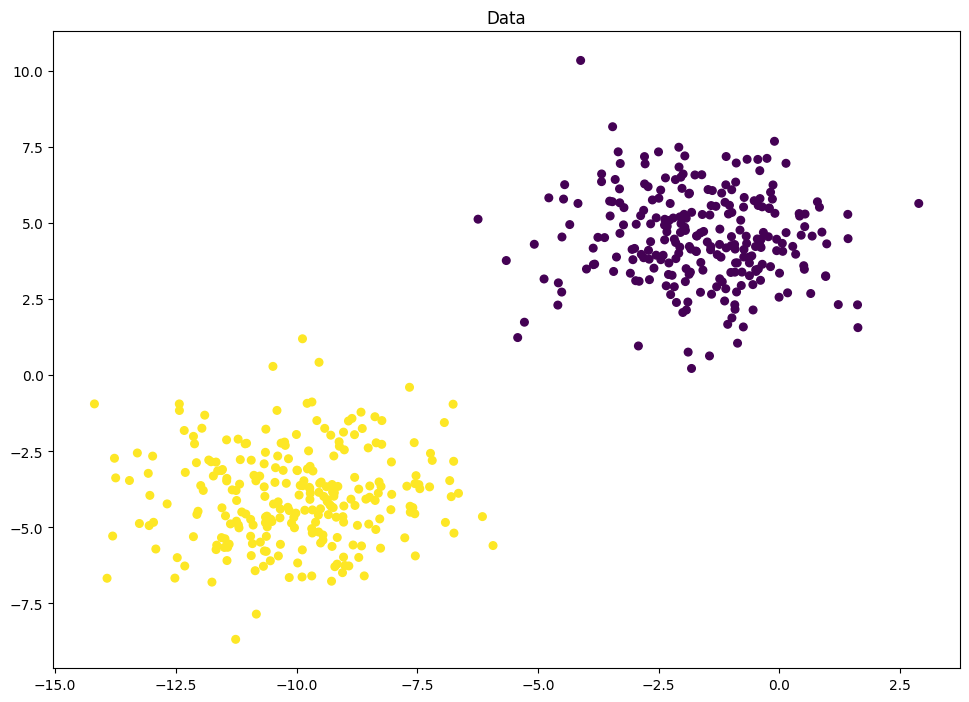

In [571]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

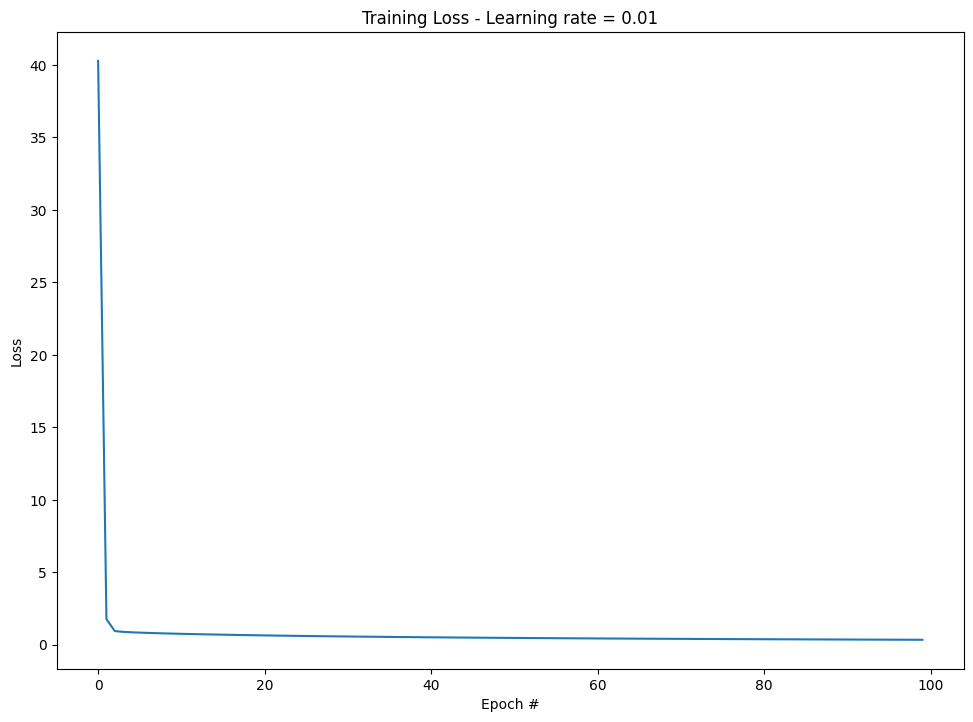

In [572]:
def plot(a=11.7, b=8.27):
    plt.figure(figsize=(a,b))
    plt.plot(range(0, num_epochs), losses)
    plt.title(f'Training Loss - Learning rate = {learning_rate}')
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.show()

plot()

## TODO: Try out different learning rates. Give me your observation

### learning rate = 0.02

Epoch=1, loss=492.0590199
Epoch=5, loss=249.1398104
Epoch=10, loss=248.9460326
Epoch=15, loss=248.7649468
Epoch=20, loss=248.5875591
Epoch=25, loss=248.3788849
Epoch=30, loss=248.0606912
Epoch=35, loss=247.4063307
Epoch=40, loss=245.6861516
Epoch=45, loss=240.9589747
Epoch=50, loss=157.7076969
Epoch=55, loss=10.8925433
Epoch=60, loss=7.6330326
Epoch=65, loss=6.7079892
Epoch=70, loss=5.6741410
Epoch=75, loss=3.9826792
Epoch=80, loss=2.4680666
Epoch=85, loss=1.5837797
Epoch=90, loss=1.1831437
Epoch=95, loss=0.9771591
Epoch=100, loss=0.8503367


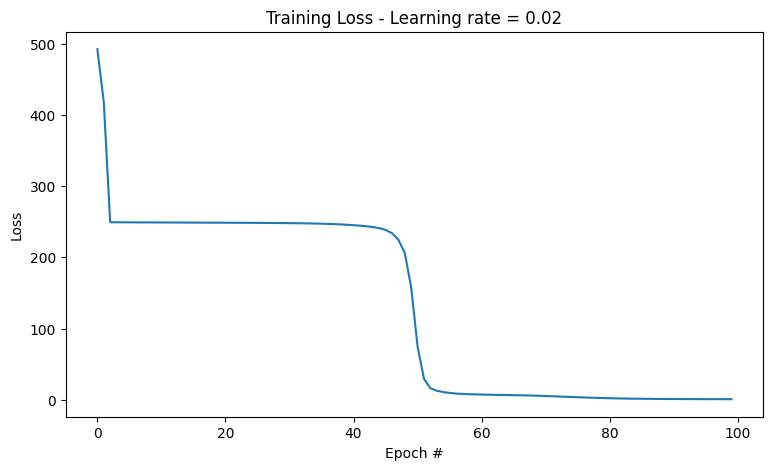

In [573]:
losses.clear()
W = np.random.randn(X.shape[1], 1)

learning_rate=0.02

W=train(W,trainX, trainY, learning_rate, num_epochs)
plot(9,5)

**lr 0.02 observation:**  
As the data and diagram illustrate, the training loss at LR 0.02 still keep non-changing performance with LR 0.01. LR 0.02 and LR 0.01 manage to reach nearly the limit after some few first epochs.

### learning rate = 1

Epoch=1, loss=9.3111601
Epoch=5, loss=82.9939310
Epoch=10, loss=25.8199193
Epoch=15, loss=11.6054124
Epoch=20, loss=11.0017024
Epoch=25, loss=11.0011318
Epoch=30, loss=11.0008476
Epoch=35, loss=11.0006773
Epoch=40, loss=11.0005639
Epoch=45, loss=11.0004829
Epoch=50, loss=11.0004222
Epoch=55, loss=11.0003750
Epoch=60, loss=11.0003373
Epoch=65, loss=11.0003064
Epoch=70, loss=11.0002807
Epoch=75, loss=11.0002590
Epoch=80, loss=11.0002404
Epoch=85, loss=11.0002242
Epoch=90, loss=11.0002101
Epoch=95, loss=11.0001977
Epoch=100, loss=11.0001866


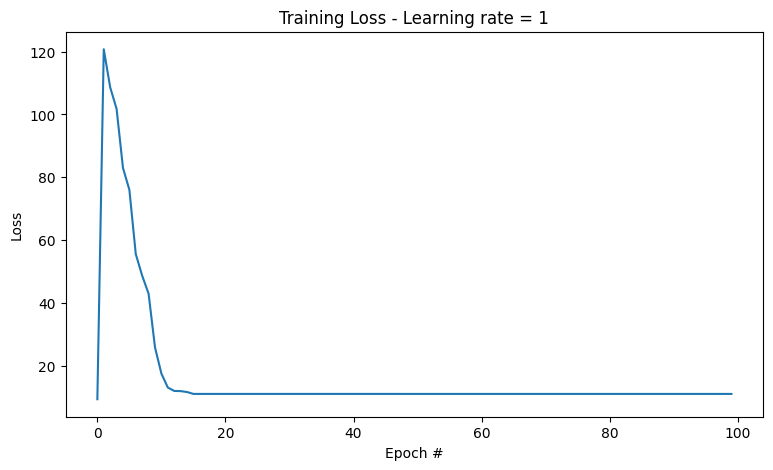

In [574]:
losses.clear()
W = np.random.randn(X.shape[1], 1)

learning_rate=1

W=train(W,trainX, trainY, learning_rate, num_epochs)
plot(9,5)

**lr 1 observation:**  
LR 1 takes some more epochs to reach "lowest" loss value, but its minimum value is higher than LR 0.02 and 0.01, the high LR keeps the algorithm bouncing near the minimum point (but cannot reach it).

### learning rate = 10

Epoch=1, loss=290.6941692
Epoch=5, loss=36.0000000
Epoch=10, loss=36.0000000
Epoch=15, loss=36.0000000
Epoch=20, loss=36.0000000
Epoch=25, loss=36.0000000
Epoch=30, loss=36.0000000
Epoch=35, loss=36.0000000
Epoch=40, loss=36.0000000
Epoch=45, loss=36.0000000
Epoch=50, loss=36.0000000
Epoch=55, loss=36.0000000
Epoch=60, loss=36.0000000
Epoch=65, loss=36.0000000
Epoch=70, loss=36.0000000
Epoch=75, loss=36.0000000
Epoch=80, loss=36.0000000
Epoch=85, loss=36.0000000
Epoch=90, loss=36.0000000
Epoch=95, loss=36.0000000
Epoch=100, loss=36.0000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_35128\1072254497.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


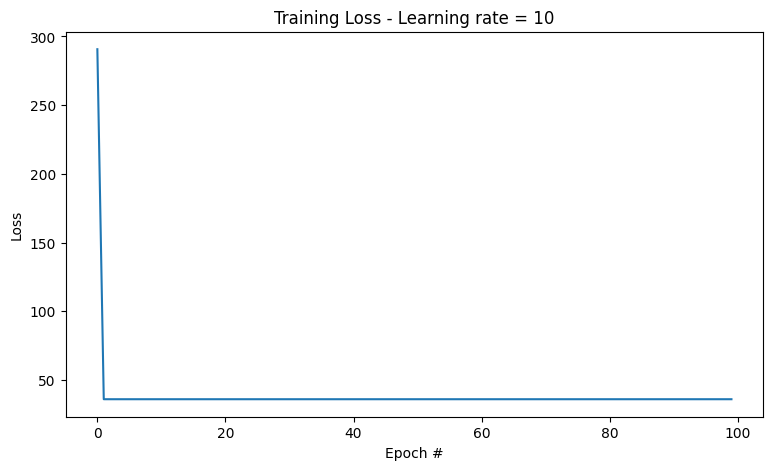

In [575]:
losses.clear()
W = np.random.randn(X.shape[1], 1)

learning_rate = 10

W=train(W,trainX, trainY, learning_rate, num_epochs)
plot(9,5)

**lr 10 observation:**  
LR 10 reduce losses faster than LR 1, LR 0.02 and LR 0.01, but the downgrade is its minimum loss is higher than all above. In some examples, the loss is too high that it overflowed the sigmoid_activation function.

## References
- [ndquy.github.io](https://ndquy.github.io/posts/gradient-descent-2/)
- [pyimagesearch.com](https://pyimagesearch.com/2016/10/10/gradient-descent-with-python/?fbclid=IwAR3VJvQ00SzqOFg5vFkB9fE4qA7Nh80r6MH5dCvZDt-_Hhlk1R-lUDLszoQ)